## Notebook 13: Classes, Curve-fit, and the Accelerating Universe
by Rachel Langgin \\
March 2022 and July 2024 \\
Haverford College and University of Nevada, Las Vegas \\

# Goals of the course!!
You will:

1. Develop problem solving skills including the following:

2. Develop problem solving skills, specifically in solving problems you’ve never seen before.

3. Develop your ability to make profitable wrong turns in solving problems. In other words, learn from your mistakes.

4. Develop your ability to break down complex problems into doable parts.

5. Develop your ability to determine if your answer is reasonable.

Develop programming specific skills including the following:

5. Learn to think like a computer (if loops, for/while loops, functions, arrays....)

6. Understand what ‘the cloud’ is.

7. Know how to make your program “object oriented.”

8. Not be intimidated by reading large data sets in.

9. Not be intimidated by weird error messages.

10. Know how to “debug” your program.



## Goals for today:

* talk about the accelerating universe.
* practicing not getting intimidated by web stuff.
* practice classes and curve-fit.

Curve-fit is much like polyfit (which we learned last week) but it's much more flexible, i.e. you don't have to fit your data to a polynomial.

Classes of programs are an example of "object oriented programming" a term you may or may not have heard.  When you hear it again please say "Oh yeah I know how to do that."

This notebook is computationally-heavy and usually takes about two classes to fully complete. Take your time on this notebook.

## The Accelerating Universe
These notes are in a pdf called Class 16 - Companion PDF - Accelerating Universe. (Notes created in 2018)

# Intro to curve-fit


Curvefit is similar tp but much more flexible than polyfit.  Curvefit will fit any arbitrary function that you can dream up to your data. In contrast, polyfit will only fit a polynomial of order $n$ to your data (e.g. a 3rd order polynomial is  $y = Ax^3 + Bx^2 + Cx + D$).

First, for the sake of practicing not being intimidated by stuff you look up on the web, check out this and practice not being intimidated:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

I copied their example below.  Verbatim!!!

In [ ]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np   #<- That's the only line I had to add to theirs to get it to work.

In [ ]:
def func(x, a, b, c):
    return a * np.exp(-b * x) + c

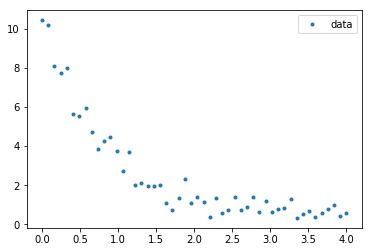

In [ ]:
# Define the data to be fit with some noise:
xdata = np.linspace(0, 4, 50)  # A little like np.arange except that in linspace you specify the start value,
# the end value, and how many values you want in between
y = func(xdata, 10.17, 1.3, 0.5)   # Set y equal to the value of the function at each x-value
# np.random.seed(1729)  # Provide a seed to the random numbers.  If you provide the same seed each time,
# you'll get the same random numbers each number
y_noise = 0.5 * np.random.normal(size=xdata.size)
ydata = y + y_noise  #. Add the noise to the data
plt.plot(xdata, ydata, '.', label='data')
plt.legend()

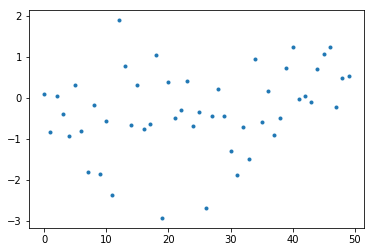

In [ ]:
plt.plot(np.random.normal(size=xdata.size), '.')

# Now we're about to pretend that we got those data from doing some experiment somewhere, and we're going to fit them to that same function.

For a truth test, we hope we get the same parameters back.

In [ ]:
# Fit for the parameters a, b, c of the function func:
popt, pcov = curve_fit(func, xdata, ydata)
popt

array([10.06855499,  1.32391852,  0.57252401])

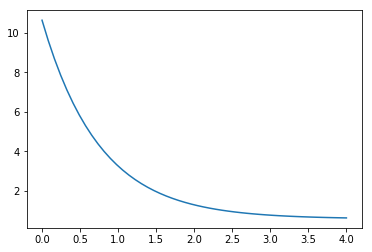

In [ ]:
# Plot the fitted curve  (A less fancy but very utilitarian way of plotting the fitting curve)
plt.plot(xdata, func(xdata, popt[0], popt[1], popt[2]))

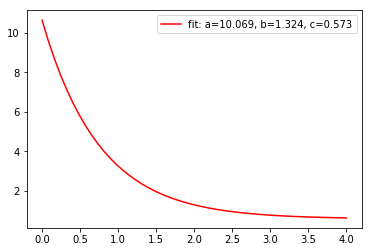

In [ ]:
# Plot the fitted curve  (note the fancy efficient way they called fund)
plt.plot(xdata, func(xdata, *popt), 'r-',    #. Fancy de-referencing tools "*"
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.legend() # Add the legend

## The following are two cells that you might find helpful if your fit doesn't seem to be working.  Sometimes you need to "constrain" the parameters so they don't go off into weird parameter space.  If your fit is working, and the parameters you get are reasonable, you can ignore these two cells.

In [ ]:
# Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:
# popt2, pcov = curve_fit(func, xdata, ydata, bounds=(-10,10))
# popt2

In [ ]:
# This does the same thing.
# Constrain the optimization to the region of 0 <= a <= 3, 0 <= b <= 1 and 0 <= c <= 0.5:
# popt, pcov = curve_fit(func, xdata, ydata, bounds=([0,0,0], [3., 1., 0.5]))
# popt

# Plot the fitted curve over the data

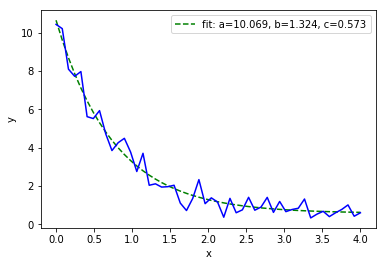

In [ ]:
plt.plot(xdata, func(xdata, *popt), 'g--',  # plotting the fitted curve
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
# plt.plot(xdata, func(xdata, *popt2), 'r-')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.plot(xdata, ydata, 'b-', label='data') # plotting the original data
plt.show()


### (part a)
* Write code that will use curve-fit to fit data to
a Gaussian

(Also note that the only thing you really have to change is my function definition above, and then you could re-use all the rest of my code.)

Here's the equation for a Gaussian:
$$
y = Ae^{-\frac{(x-B)^2}{2C^2}}
$$
You're supposed to capitalize "Gaussian" because it was named after a (dead white) guy named Gauss.
C is called the width of the Gaussian.  Notice that C actually is a pretty good estimate of the width of the peak.

    Gaussians are REALLY common in nature. You'll encounter them again in many fields (economics, business, biology, chemistry, linguistics, astronomy....)

* In order to test your function. Create a data set for your self by using a simple model (probably a Gaussian) and adding random noise to it.

# My answers to part a
I mostly copied cells from above and altered them slightly.

In [ ]:
def gfunc(x, a, b, c):  # Function that computes a Gaussian at position x
    return a * np.exp(-(x-b)**2/(2*c**2))

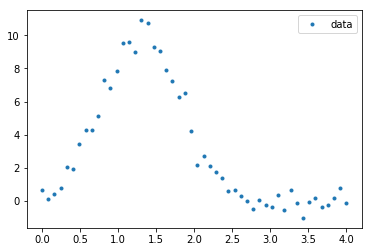

In [ ]:
# Create fake data to test it on
xdata = np.linspace(0, 4, 50)  # create evenly spaced x-data
y = gfunc(xdata, 10.17, 1.3, 0.5)   # Set y equal to the value of the function at each x-value
# np.random.seed(1729)  # Provide a seed to the random numbers.  If you provide the same seed each time,
# you'll get the same random numbers each number
y_noise = 0.5 * np.random.normal(size=xdata.size)
ydata = y + y_noise  #. Add the noise to the data
plt.plot(xdata, ydata, '.', label='data')
plt.legend()

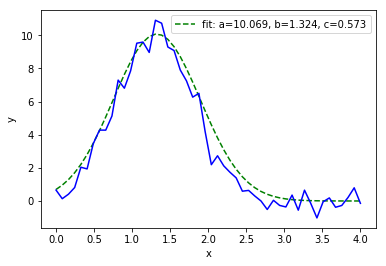

In [ ]:
plt.plot(xdata, gfunc(xdata, *popt), 'g--',  # plotting the fitted curve
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.plot(xdata, ydata, 'b-', label='data') # plotting the original data
plt.show()


### (part b)

Put the code above into a function.  I've started the function for you in the next cell.

In [ ]:
"""Function that accepts an array of x-values, an array of y-values, and fits
them to a Gaussian function, and plots the results"""
def fitgauss(x, y):
    popt, pcov = curve_fit(gfunc, x, y)
    plt.plot(x,y)
    plt.plot(x, func(x, *popt))

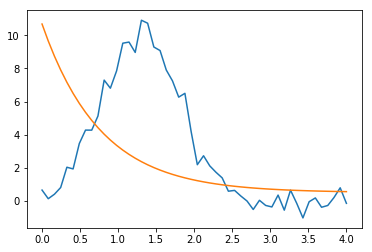

In [ ]:
# call the function
fitgauss(xdata,ydata)

# Introduction to Classes

You have actually been using classes (of programs) already.  You just didn't know it. append is a really good example.  You may have noticed the syntax is a little weird.  Let me remind you how append works.

In [ ]:
y = []  # instantiate y as a list ('instantiate' is a fancy python word)
for i in range(10):
    y.append(i**2)  #Object oriented method "append", it operates on the object y
y

So append is a method that operates on the object "y". That's the general syntax of classes, is that you name an object, then there's a period, and then you name a method that you want to use.   Methods are really useful
when you know you want to be able to do a bunch of different things with the same "object".  In my mind "object" is usually a dataset, but that's because of my field.  

Let's write out a class and use it!

Here's the basic structure of a class.  

A class has a name (in this case "Data") and an initializing method that's always called "init" with two underlines on either side of it, and then there are methods defined below that.  Let's start with the "init" and
one method.

In [ ]:
class Data:
    """A class for plotting and fitting data"""
    def __init__(self, xvalues, yvalues):   # Two attributes so far:  xdata and ydata
        self.xdata = xvalues   # The "init" tells the class how to store the values you
        self.ydata = yvalues    # passed to it.  In this case, we've just passed xvalues and yvalues.

    def plotspecial(self):     # This is a "method" because it's inside a Class
        plt.plot(self.xdata, self.ydata, '.')   # Inside the class notice I refer to the data by
            # the name we gave it in "__init___"

Let's try it!
First let's make up some x and y data for testing purposes.

In [ ]:
# Creating test data
x= np.arange(100)
y = x**2   #Notice that was a lot easier way to accomplish what I did above with append.
y=y+ np.random.normal(0,500,100)  # I haven't figured out why y+= np.random.... doesn't work there...

So we need some lingo.  What I'm about to do is "instantiate" an "instance" of the "class" called "Data". "myfakedata" is also called an "object."  I can perform operations on
my object by using "methods".


In [ ]:
# Using our Data class
myfakedata = Data(x,y)  # Instantiate myfakedata as a object in the class "Data"

I will just tell you that "instantiate" took me awhile to get used to.  Sometimes I think python people just say it a lot to sound really smart.  I guarantee you that Moodle is built as a object-based program.  When your professors start up a new course, they (unconsciously) create an "instance" of a course, where what a course basically is has been defined by Moodle.  Once the professor has "instantiated" their course, then they can modify it to their particular way of using Moodle.  So you'll notice that all Moodle courses have a particular look and have many things in common, but each professor can modify it slightly for their own purposes.  So back in January I instantiated our course on Moodle called PHY104. So now when you log onto Moodle you look at our "instance" of Moodle that I created for us, called PHY104.

So to use our "instance" of the class "Data" called "myfakedata" I can call "methods" on it.  As follows...

Remember I told you that it's always the name of the instance "dot" the method

In [ ]:
myfakedata.plotspecial()
# By the way, it just took me 10 minutes to figure out why "myfakedata.plot" produced no plot.   If you
# leave out the parenthesis you're not actually calling the method (or function).  The parenthesis are how you tell python
# that you're calling the method or function. If you don't believe me, type "np.sqrt" in the next cell.  It
# doesn't produce an error, it just names the function for you.

Woo hoo!!  Let's add another method to our class, because so far it doesn't do much. Let's make it fit an exponential.  I'm going to redefine the class below so that you can see the progression in this notebook, but I could just adjust the class in the cell above. (That's what I would do if I weren't teaching a class.)

Here's the equation for an exponential.

$$
y = Ae^{Bx}+ C
$$

In [ ]:
# First let's practice outside the class and not make it a method yet.
# With curvefit you need a function first:
def fexp(x, a, b, c):
    return(a*np.exp(b*x) + c)


In [ ]:
# See if the function works
plt.plot(x, fexp(x, 1,.03,4))

In [ ]:
# Let's plot our data just to remind ourselves what it looks like
plt.plot(x,y)

In [ ]:
# Now let's try fitting
popt, pcov = curve_fit(fexp, x, y, bounds = ( [-np.inf, -1, -np.inf], [np.inf, 1, np.inf]))
# popt, pcov = curve_fit(fexp, x, y)


The bounds I put because otherwise the fit "blows up".  Take away the bounds and you'll see what I mean.  Fitters can "run away" from the right answer especially when they're trying to fit a function that can return very large and very small values (such as an exponential.). The bounds command says that the parameters a, b, and c, should not be less than -10 or larger than 10.

Those are pretty fancy bounds. They're the result of a lot of trial and error.  What they mean is that I have told python that parameter "a" has to be between -infinity and infinity, which basically means it has no bound.  "b" has to be between -1 and 1.  And "c" goes from -infinity to infinity, so it's not really bound either.  

You are unlikely to need bounds on any of your fits, so I advise leaving them off to start.  I'll show you how I knew I needed bounds.  (We'll take them out and I'll show you what happens.)

In [ ]:
popt

## (Truth-testing alert: Note how useful it is to test your functions on something you know the answer to.  I knew what values those parameters should fit to, because I created the data in the first place.  That's how you truth test.)

## Overplot your model on your data
the curvefit output makes it pretty easy!!!

In [ ]:
# plt.plot(x, fexp(x, popt[0], popt[1], popt[2]))
plt.plot(x, fexp(x,*popt))  # Used my original x values, and the then values of
# the fitted function at each of those points
plt.plot(x,y, 'g-')  # plotting my original data

Nice fit!!!
Okay now that we actually have it working, let's make it into a method.

Notice the steps I took:
1. Created thing I want to do outside the class. (In this case, I created a function, called it, and made sure it worked by plotting it.)
2. Copied and pasted the call to the function inside the class definition.  I replaced "x" with "self.xdata" and "y" with "self.ydata".
3. Called the method. Remember you call a method starting with the name of the object, then a "dot", and then the name of the method.  If the only argument to the method in its definition is self then the method is using parameters that have already been defined in the class, like self.xdata and self.ydata.

In [ ]:
class Data:
    """A class for plotting and fitting data"""
    def __init__(self, xvalues, yvalues):   # Two attributes so far:  xdata and ydata
        self.xdata = xvalues
        self.ydata = yvalues

    def plot(self):     # This is a "method" because it's inside a Class
        plt.plot(self.xdata, self.ydata, '.')

    def fit_exp(self):   # This method will fit an exponential
        # Let's leave the bounds there right now, but we want those to be variables eventually
        popt, pcov = curve_fit(fexp, self.xdata, self.ydata, bounds=([-np.inf, -1, -np.inf], [np.inf, 1, np.inf]))
        print(popt)

In [ ]:
# calling the method
# as I said above, it's the name of the object, the name of the method, and then
# empty parentheses if the only argument in the definition is self.
myfakedata.fit_exp()

Ah, so this doesn't work because when the class was instantiated, the class didn't have a fit_exp method.

In [ ]:
myfakedata = Data(x,y)  # Instantiate myfakedata as a object in the class "Data"

In [ ]:
myfakedata.fit_exp()

Yay!!  We got the same thing.

Assignment:

* Copy the whole cell where I define the class below, because you're going to make some small adjustments to it.
* Add a few lines to the fit_exp() method so that it plots the data with the fitted model on top of it.  The tricky part is figuring out what to put in the plt.plot statement instead of x and y.  Use my call to curve_fit in the fit_exp method for clues.  Don't hesitate to ask for help.


* Create a method in the class that fit the data to a Gaussian (you can use the code you created on Tuesday)
Here's the equation for a Gaussian:
$$
y = Ae^{-\frac{(x-B)^2}{2C^2}}
$$
C is called the width of the Gaussian.  Notice that C actually is a pretty good estimate of the width of the peak.

    Gaussians are REALLY common in nature. You'll encounter them again in many fields (economics, business, biology, chemistry, linguistics, astronomy....)

* In order to test your class and its methods. Create various data sets for your self by using a simple model (Gaussian, exponential, polynomial) and adding random noise to it.

Bonus assignments:
    
* Separate out the fitting and the plotting so that you can use either of your models to fit, and then plot the results in a variety of ways.

* One method plots the model on top of the data as we have been.

* One model plots the residuals, i.e. the difference
    between your model and your data.<br>
* Hint: If you add a parameter to "self" i.e. "self.bestfity" and set that equal to something (e.g. the best fit y values) , you can use those parameters anywhere in the class.